Link to dataset:
https://data.wprdc.org/dataset/property-data-with-geographic-identifiers/resource/8eff881d-4d28-4064-83f1-30cc991cfec7
https://data.wprdc.org/datastore/dump/8eff881d-4d28-4064-83f1-30cc991cfec7

In [2]:
#import relevant libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#load data
#usecols=[0,25,35,68, 69,70,71,88] to include condition info
property_data = pd.read_csv("property_data_pittsburgh_wprdc.csv", 
                                       index_col="_id", usecols=[0,25,35,88], low_memory=False) # use the column named _id as the row index

In [3]:
property_data.head(10) #first 10 rows
#property_data.info() # Display the datatypes of the index and columns as well as memory usage
#property_data.describe() #summary Statistics

,CLASSDESC,SALEPRICE,NEIGHBORHOOD
_id,,,
1,RESIDENTIAL,699000.0,Central Business District
2,RESIDENTIAL,350000.0,Central Business District
3,RESIDENTIAL,265000.0,Central Business District
4,RESIDENTIAL,25550.0,Bluff
19,COMMERCIAL,0.0,Bluff
5,RESIDENTIAL,45550.0,Bluff
6,COMMERCIAL,85000.0,Bluff
7,COMMERCIAL,250000.0,Bluff
8,COMMERCIAL,113000.0,Bluff


In [42]:
#sorted by neighborhood
property_data_by_neighborbood = property_data.groupby('NEIGHBORHOOD')
#property_data_by_neighborbood.describe()

#cut down the data, remove the neighborhoods with less than 20 properties in them.
property_data_by_neighborbood = property_data.groupby('NEIGHBORHOOD').filter(lambda x : len(x)>20)
#property_data_by_neighborbood = property_data_by_neighborbood.filter(lambda x: )
#property_data_by_neighborbood.head(20)



value_counts = property_data['NEIGHBORHOOD'].value_counts()
print("value counts \n",value_counts)
print("original")
#print(property_data.sort_values(by =['SALEPRICE']))
print(property_data)

#property_data.sort_values(by =['SALEPRICE'])


#get rid of sale prices <=10 dollars
price_mask = property_data['SALEPRICE'] <= 10 #these are the values we are removing
edited_property_data = property_data.mask(price_mask)

print("removed sale prices<=10")
#print(edited_property_data.sort_values(by =['SALEPRICE']))
print(edited_property_data)

#remove NaN neighborhoods
edited_property_data = edited_property_data[edited_property_data['NEIGHBORHOOD'].notnull()]
print("removed NaN neighborhoods")
print(edited_property_data)

#isolate the two property types we are focusing
type_commercial_mask = edited_property_data['CLASSDESC']=='COMMERCIAL'
type_residential_mask = edited_property_data['CLASSDESC']=='RESIDENTIAL'
commercial_data = edited_property_data[type_commercial_mask]
residential_data = edited_property_data[type_residential_mask]

print("just commercial")
print(commercial_data)

print("just residential")
print(residential_data)

#group by neighborhood, and then get summary statistics for each neighborhood based on price
#^done!
#if saleprice == 0, drop row.
#get rid of neighborhoods with 20 or less data points.

#make 2 seperate graphs for residential and commercial?

#for index, row in property_data.iterrows():
    
    
#commercial vs residential
#two seperate analysis


value counts 
 Brookline              5270
Carrick                3827
Squirrel Hill South    3794
Mount Washington       3617
Beechview              3454
                       ... 
South Shore             145
Northview Heights        84
Glen Hazel               58
Allegheny Center         51
Arlington Heights         8
Name: NEIGHBORHOOD, Length: 91, dtype: int64
original
          CLASSDESC  SALEPRICE               NEIGHBORHOOD
_id                                                      
1       RESIDENTIAL   699000.0  Central Business District
2       RESIDENTIAL   350000.0  Central Business District
3       RESIDENTIAL   265000.0  Central Business District
4       RESIDENTIAL    25550.0                      Bluff
19       COMMERCIAL        0.0                      Bluff
...             ...        ...                        ...
408796  RESIDENTIAL    11000.0                        NaN
408797   COMMERCIAL    50000.0                        NaN
408798   COMMERCIAL    50000.0             

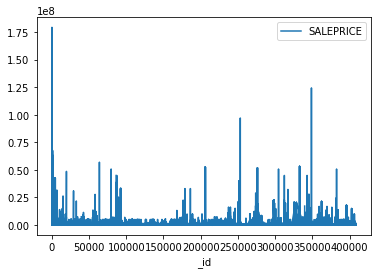

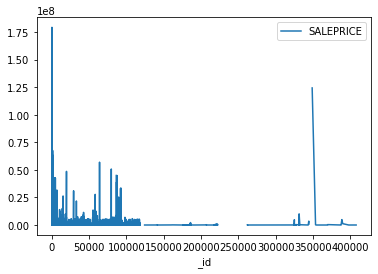

In [22]:
property_data.plot() #not helpful. sorted by id
property_data_by_neighborbood.plot()